## Problem Statement:


Identifying the process and pattern based on the client difficulties on payment of their loans
and the action to be taken such as Rejecting the Loan, Reducing the Loan Amoun or Lending the Loan at Higher Interest.

Based on Bank's Decision the following risks may raise:

If the applicant's history is good or he is likely to repay the loan, then not approving the loan leads to a Business loss to the company.

If the applicant is unable to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Importing  Required Libraries

In [5]:
# Importing Warnings to handle the errors
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Importing required  Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Reading the application_data.csv DataSet into app_data

In [7]:
#reading  "application data.csv" in app_data
app_data = pd.read_csv("application_data.csv")

In [8]:
#Printing the first 5 columns of the data set.
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Printing the last 5 columns of the data set.
app_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [10]:
#Checking number of rows and columns again
app_data.shape

(307511, 122)

In [11]:
#Printing the information of Dataset
app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Imputing / Remove Missing Values

In [12]:
## count the missing values
missing_value_counts = app_data.isnull().sum()

In [13]:
#look at the number of missing points in first 20 columns
missing_value_counts[0:20]

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [14]:
# total missing values
total_cells = np.product(app_data.shape)
total_missing = missing_value_counts.sum()

In [15]:
# Finding the Total percent of data that is missing in Dataset
percent_missing = (total_missing/total_cells) * 100
print("Total percent of missing values in the Dataset:",round(percent_missing,4))

Total percent of missing values in the Dataset: 24.3959


In [16]:
#Percent of data missing in each column
round((app_data.isnull().sum()/len(app_data)*100)[0:30],3)


SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.004
AMT_GOODS_PRICE                0.090
NAME_TYPE_SUITE                0.420
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_REGISTRATION              0.000
DAYS_ID_PUBLISH                0.000
OWN_CAR_AGE                   65.991
FLAG_MOBIL                     0.000
FLAG_EMP_PHONE                 0.000
FLAG_WORK_PHONE                0.000
FLAG_CONT_MOBILE               0.000
FLAG_PHONE                     0.000
F

In [17]:
#finding the column names with missing values
app_data.columns[app_data.isnull().any()]


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [18]:
app_data.shape

(307511, 122)

In [19]:
# length of null value columns having more than 45%

missing_value_col=app_data.isnull().sum()
missing_value_col=missing_value_col[missing_value_col.values>(0.45*len(app_data))]
print(" null values columns having more than 45% is",len(missing_value_col))

 null values columns having more than 45% is 49


###  Data Cleaning


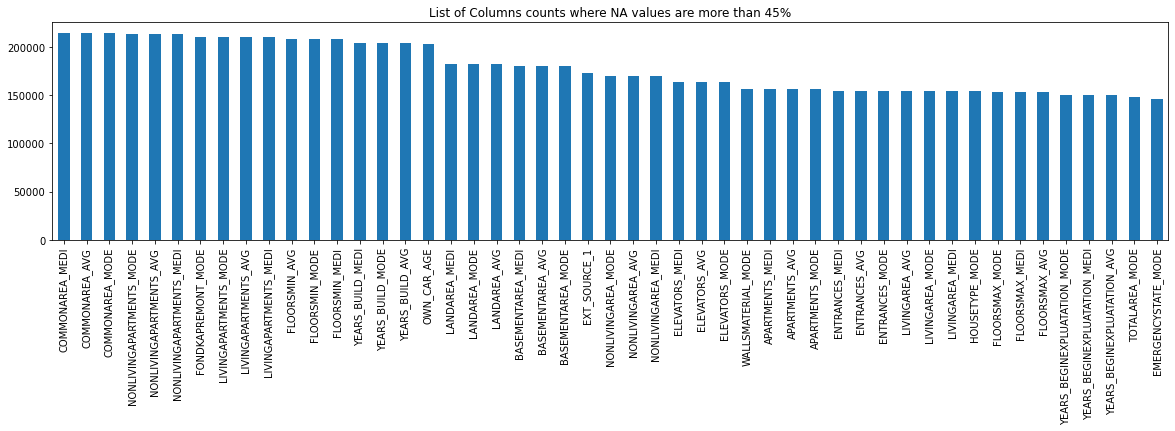

In [20]:
# List of Columns  where NA values having more than 45%

missing_value_col = app_data.isnull().sum().sort_values(ascending = False)
missing_value_col = missing_value_col[missing_value_col.values >(0.45*len(app_data))]
plt.figure(figsize=(20,4))
missing_value_col.plot(kind='bar')
plt.title('List of Columns counts where NA values are more than 45%')
plt.show()

In [21]:
len(missing_value_col)

49

In [22]:
#function to remove null values
def removeNulls(dataframe,percent=0.45):
    d_frame = dataframe.copy()
    ishape = d_frame.shape
    col_names = (d_frame.isnull().sum()/len(d_frame))
    col_names = list(col_names[col_names.values>=percent].index)
    d_frame.drop(labels = col_names,axis =1,inplace=True)        
    print("No. of Columns dropped\t: ",len(col_names))    
    print("\nSize of old DataSet",ishape,"\nSize of New DataSet",d_frame.shape)
    return d_frame

In [23]:
# Comparision of shape of new and old data sets
app_data = removeNulls(app_data,percent = 0.45)

No. of Columns dropped	:  49

Size of old DataSet (307511, 122) 
Size of New DataSet (307511, 73)


In [24]:
# finding the null value % of  each column.
missing_value = app_data.isnull().sum()/len(app_data)*100
round(missing_value.sort_values(ascending = False)[0:50],3)

OCCUPATION_TYPE               31.346
EXT_SOURCE_3                  19.825
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
NAME_TYPE_SUITE                0.420
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
EXT_SOURCE_2                   0.215
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
FLAG_DOCUMENT_17               0.000
FLAG_DOCUMENT_18               0.000
FLAG_DOCUMENT_21               0.000
FLAG_DOCUMENT_20               0.000
FLAG_DOCUMENT_19               0.000
FLAG_DOCUMENT_2                0.000
FLAG_DOCUMENT_3                0.000
FLAG_DOCUMENT_4                0.000
FLAG_DOCUMENT_5                0.000
F

### Imputing missing_values

In [25]:
# OCCUPATION_TYPE
app_data[app_data.OCCUPATION_TYPE.isnull()]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [26]:
app_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
#mode can be used to impute the missing_values in OCCUPATION_TYPE column with value of Laborers
app_data.OCCUPATION_TYPE.mode()


0    Laborers
dtype: object

In [28]:
#AMT_REQ_CREDIT_BUREAU_YEAR
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [29]:
#Imputing the missing values in AMT_REQ_CREDIT_BUREAU_YEAR using mode.
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()


0    0.0
dtype: float64

Similarly we can impute the missing values of columns
'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT'
with the mode, which is the value '0'. 

In [30]:
#AMT_REQ_CREDIT_BUREAU_MON
app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()


0    0.0
dtype: float64

In [31]:
#AMT_REQ_CREDIT_BUREAU_WEEK
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()


0    0.0
dtype: float64

In [32]:
#AMT_REQ_CREDIT_BUREAU_DAY
app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()


0    0.0
dtype: float64

In [33]:
#AMT_REQ_CREDIT_BUREAU_HOUR
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()


0    0.0
dtype: float64

In [34]:
#AMT_REQ_CREDIT_BUREAU_QRT
app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()


0    0.0
dtype: float64

In [35]:
#AMT_GOODS_PRICE
app_data[app_data["AMT_GOODS_PRICE"].isnull()]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [36]:
app_data.AMT_GOODS_PRICE.value_counts() 


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [37]:
# we can Impute the missing values with median where the value is 450000.0
app_data.AMT_GOODS_PRICE.median()


450000.0

In [38]:
#AMT_ANNUITY
app_data.AMT_ANNUITY.value_counts()


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [39]:
# we can Impute the missing values with median where the value is 9000.0
app_data.AMT_ANNUITY.median()


24903.0

In [40]:
app_data[app_data['NAME_TYPE_SUITE'].isnull()].head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


### Handling Errors in application_data.csv Dataset

In [41]:

# Checking the values in columns starting with 'DAYS'
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


days contains the negative values which is an error this can be corrected using abs function.

In [42]:
# finding the columns starting with 'DAYS'
column_fill = [col for col in app_data if col.startswith('DAYS')]
column_fill

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [43]:
#changing the negative data to positive uding abs function
app_data[column_fill]= abs(app_data[column_fill])


In [44]:
# Checking the data again whether the days is changed to positive values
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [45]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [46]:
#checking CODE_GENDER column
app_data.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### The CODE_GENDER column contains some columns with XNA which is inappropriate.

In [47]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [48]:
#ORGANIZATION_TYPE
app_data['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [49]:
app_data.ORGANIZATION_TYPE.value_counts().head(20)


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Name: ORGANIZATION_TYPE, dtype: int64

In [50]:
# Replacing the 'XNA' values with NaN 
app_data = app_data.replace('XNA',np.NaN)


In [51]:
app_data.ORGANIZATION_TYPE.value_counts().head(20)


Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Name: ORGANIZATION_TYPE, dtype: int64

In [52]:
#changing the column values to numeric
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Binning Continuous Variables

In [53]:

# Binning 'AMT_INCOME_RANGE' column values
app_data['AMT_INCOME_RANGE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['V_LOW', 'LOW', "MEDIUM", 'HIGH', 'V_HIGH'])
app_data['AMT_INCOME_RANGE'].head()

0    MEDIUM
1      HIGH
2     V_LOW
3       LOW
4       LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['V_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'V_HIGH']

In [54]:
# Binning 'AMT_CREDIT_RANGE' column values.
app_data['AMT_CREDIT_RANGE'] = pd.qcut(app_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['V_LOW', 'LOW', "MEDIUM", 'HIGH', 'V_HIGH'])
app_data['AMT_CREDIT_RANGE'].head()

0      LOW
1     HIGH
2    V_LOW
3      LOW
4      LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['V_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'V_HIGH']

In [55]:
# Converting 'DAYS_BIRTH' to years
app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)

In [56]:
app_data['DAYS_BIRTH'].unique()


array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [57]:
#Binning DAYS_BIRTH column values
app_data['DAYS_BIRTH_BINS']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])


In [58]:
app_data['DAYS_BIRTH_BINS'].value_counts()


Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

### Finding Outliers

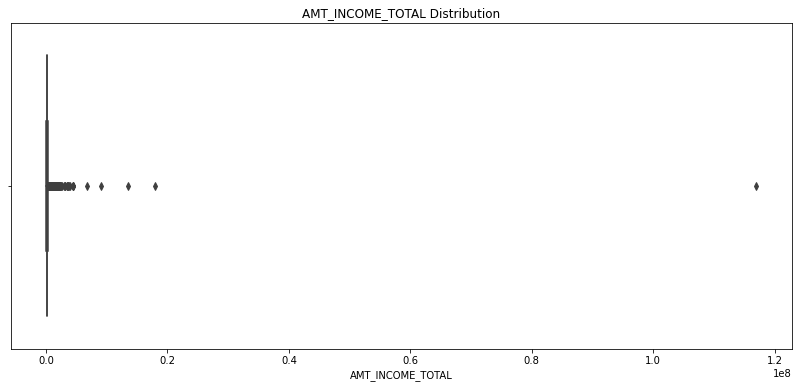

In [59]:
# checking for outliers in 'AMT_INCOME_TOTAL' column.
plt.figure(figsize = (14,6))
plt.title("AMT_INCOME_TOTAL Distribution")
ax = sns.boxplot(x=app_data["AMT_INCOME_TOTAL"])
plt.show()


 In the coloumn 'AMT_INCOME_TOTAL'  We observe a value of 117M which is  an outlier.



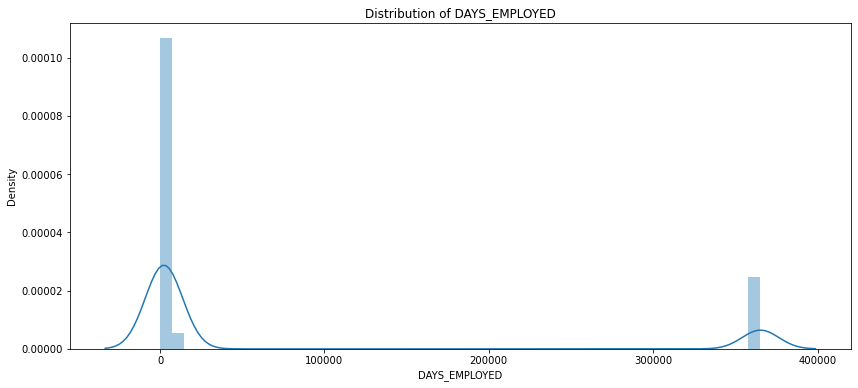

In [60]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize = (14,6))
sns.distplot(app_data['DAYS_EMPLOYED'])
plt.title('Distribution of DAYS_EMPLOYED')
plt.show()

In the coloumn 'DAYS_EMPLOYED' We observe a value which is greater that 20,000 which is  an outlier because 25,000/365 will be 54 years.



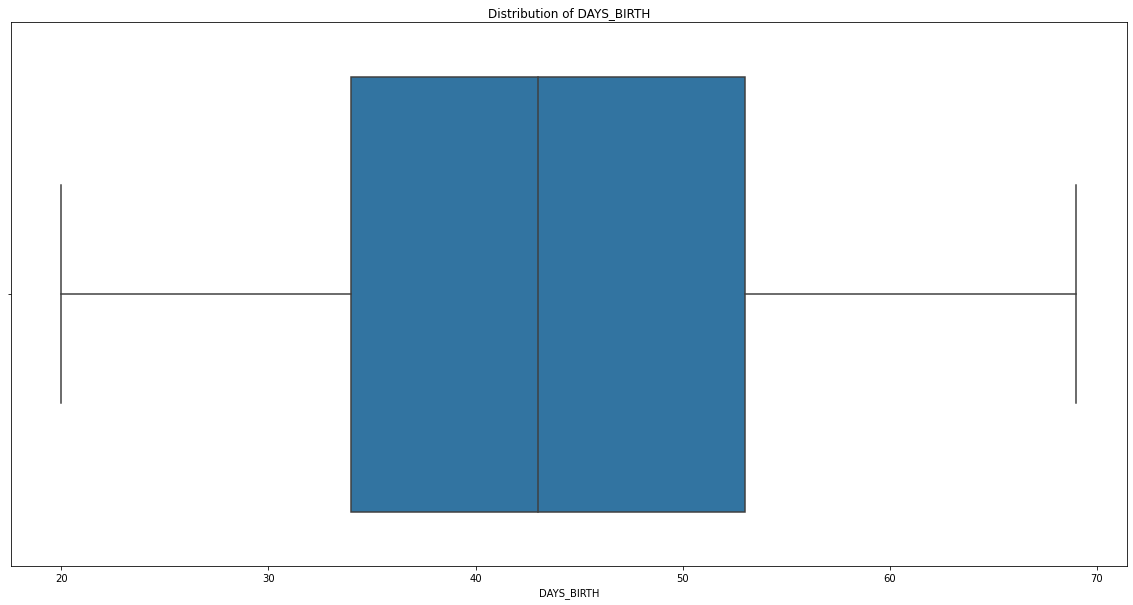

In [61]:

plt.figure(figsize = (20,10))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.boxplot(x=app_data["DAYS_BIRTH"])
plt.show()

There is no Outlier in "DAYS_BIRTH" Column.

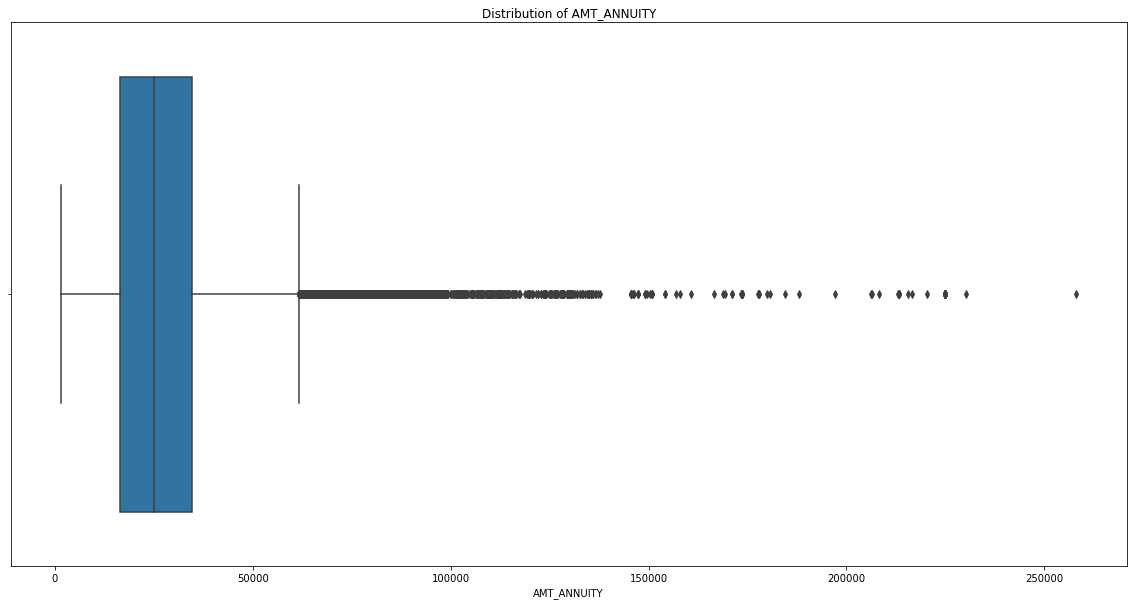

In [62]:

plt.figure(figsize = (20,10))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.boxplot(x=app_data["AMT_ANNUITY"])
plt.show()

In coloumn 'AMT_ANNUITY'  there is  a value  258000 which is an outlier.



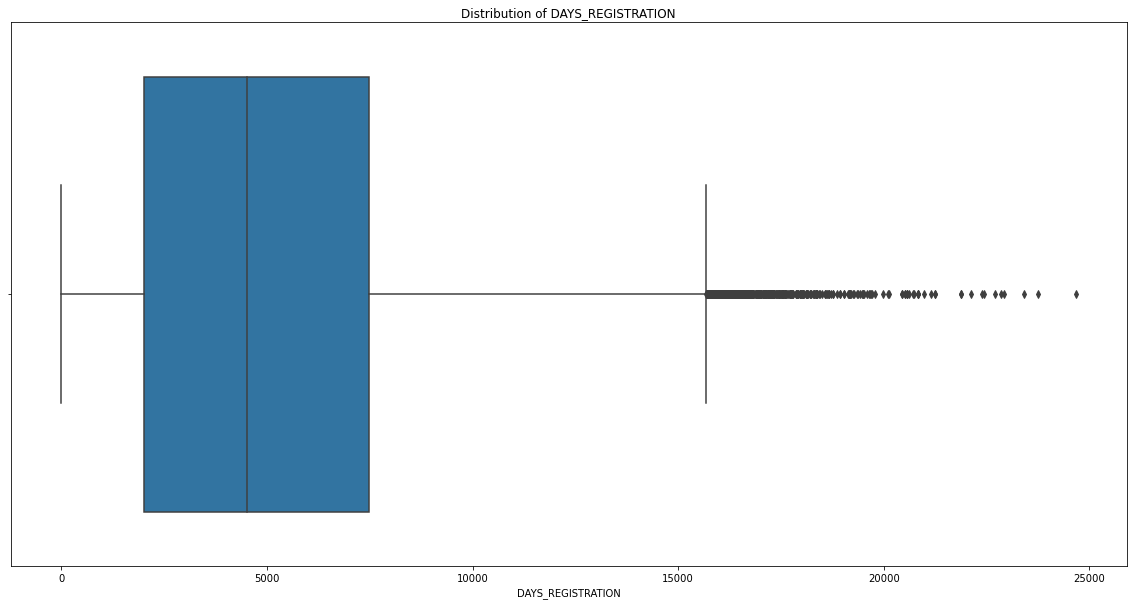

In [63]:
plt.figure(figsize = (20,10))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.boxplot(x=app_data["DAYS_REGISTRATION"])
plt.show()

In the coloumn 'DAYS_REGISTRATION', Wecan observe a Outlier value at  24000.


### Checking Imbalance

In [64]:
app_data['TARGET'].value_counts(normalize=True)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

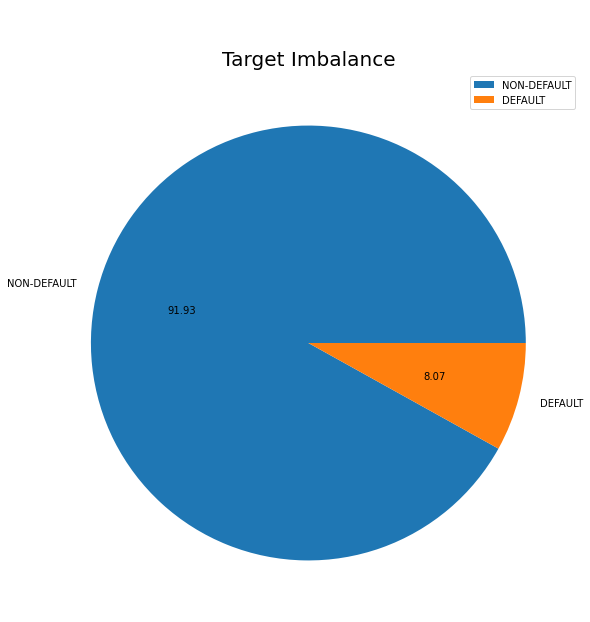

In [65]:
## Checking Imbalance
plt.figure(figsize = (20,10))
plt.title("\n\nTarget Imbalance",fontsize = 20)
im = app_data["TARGET"].value_counts()
labels =['NON-DEFAULT','DEFAULT']
values = im.values
plt.pie(im,labels = labels,autopct='%.2f')
plt.legend()
plt.show()

The Imbalance is high between TARGET variables

### Dividing the Dataset into two datasets based on the TARGET value.

In [66]:
# Dividing the dataset into two  datasets based on the target value
target0 = app_data.loc[app_data.TARGET == 0]
target1 = app_data.loc[app_data.TARGET == 1]

### Univariate Analysis


In [67]:
app_data[app_data.TARGET==0].shape[0]/app_data[app_data.TARGET==1].shape[0]


11.387150050352467

In [68]:
# function to plot for categorical variables
def plotunicat(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=target0,ax=ax1)
    ax1.set_ylabel("Total Counts")
    ax1.set_title(f"Distribution of {var} for Non-Defaulters")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=target1,ax=ax2)
    ax2.set_ylabel("Total Counts")
    ax2.set_title(f"Distribution of {var} for Defaulters")    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()
    

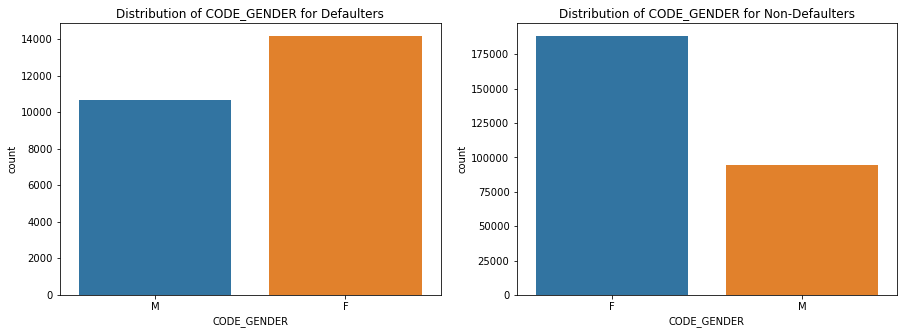

In [69]:
#CODE_GENDER
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = target1)
plt.title('Distribution of CODE_GENDER for Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = target0)
plt.title('Distribution of CODE_GENDER for Non-Defaulters')

plt.show()

The Female contribute more to the non-defaulters and less to the defaulters.
We can observe that more female applying for loans than males and also
We can observe that female applying for loans than males

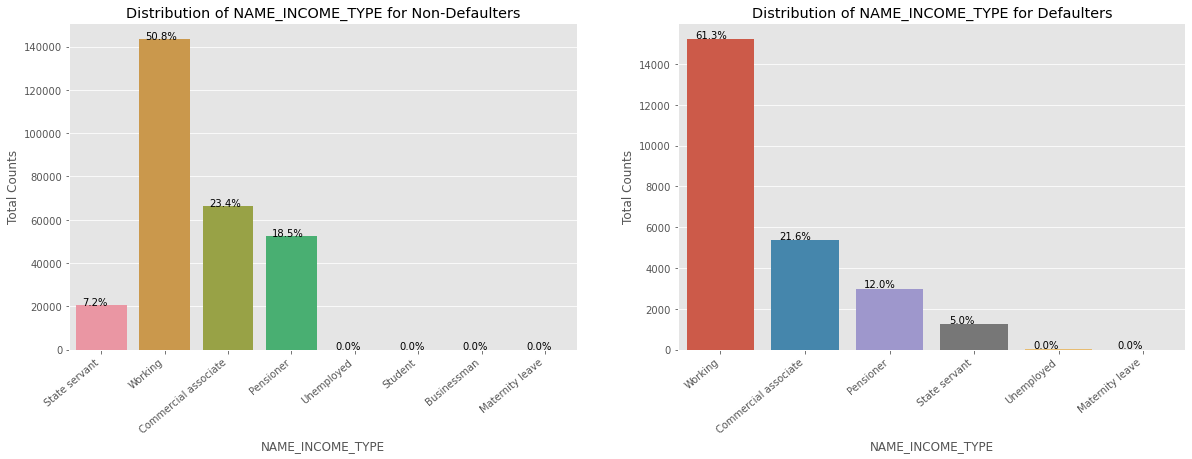

In [70]:
plotunicat('NAME_INCOME_TYPE')


In [71]:


app_data["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

We can see that working  contribute 51% to non defaulters while they contribute  61% of the defaulters.
Hence, defaulting is  more in this case.

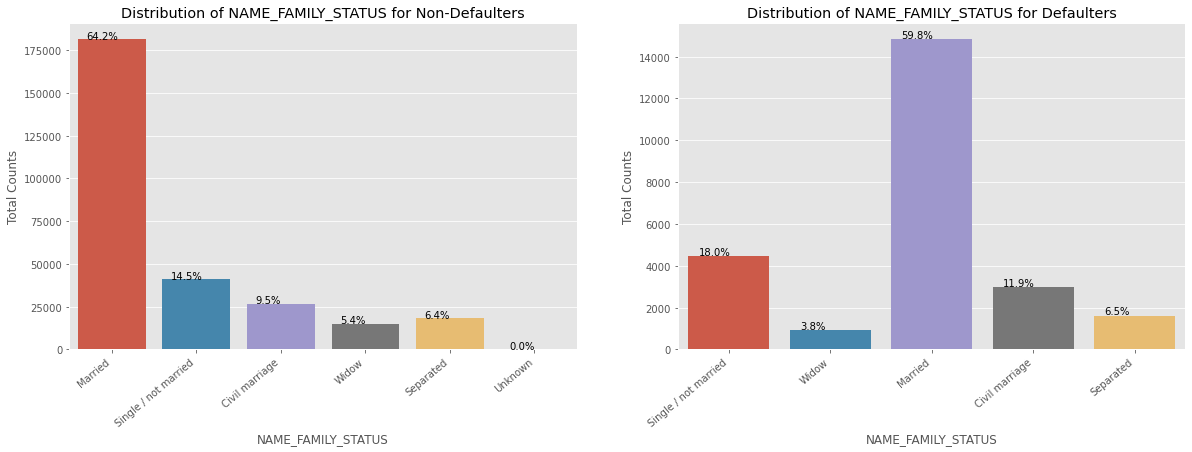

In [72]:
plotunicat('NAME_FAMILY_STATUS')


Here, Married people apply for more loan in both cases 
and the Single/not married is more in Non-Defaulters than Defaulters.
Hence there is risk with them.


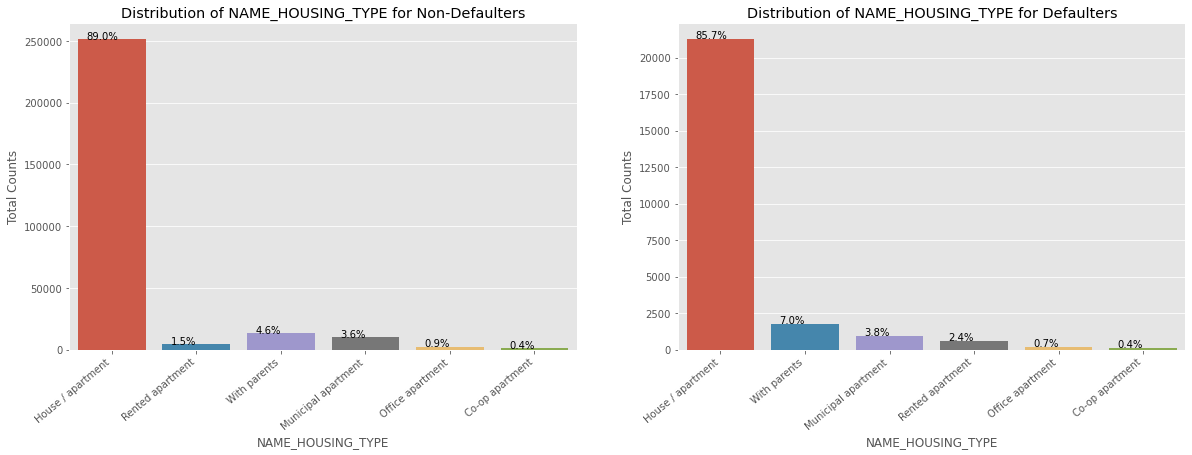

In [73]:
plotunicat('NAME_HOUSING_TYPE')


Here we can observe that  people who have House/Appartment,  apply for more loans.
People living with parents tend to default more often when compared with others.


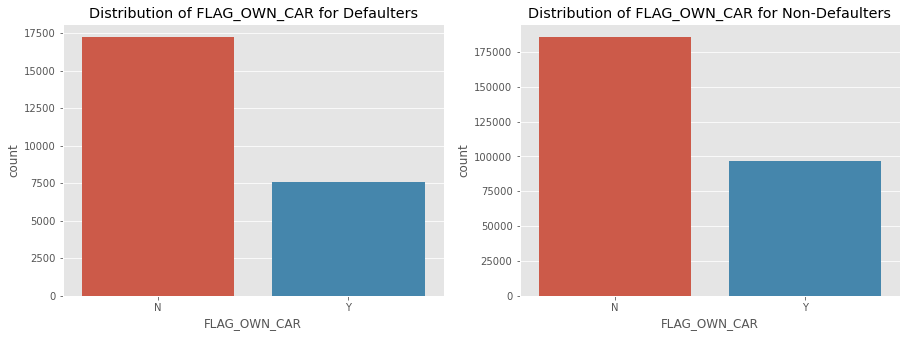

In [74]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = target1)
plt.title('Distribution of FLAG_OWN_CAR for Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = target0)
plt.title('Distribution of FLAG_OWN_CAR for Non-Defaulters')

plt.show()

We can see that people with cars contribute less to the non-defaulters and more to the defaulters. We can conclude that
From the plot,we can observe that people with cars are more of defaulters than non-defaulters.


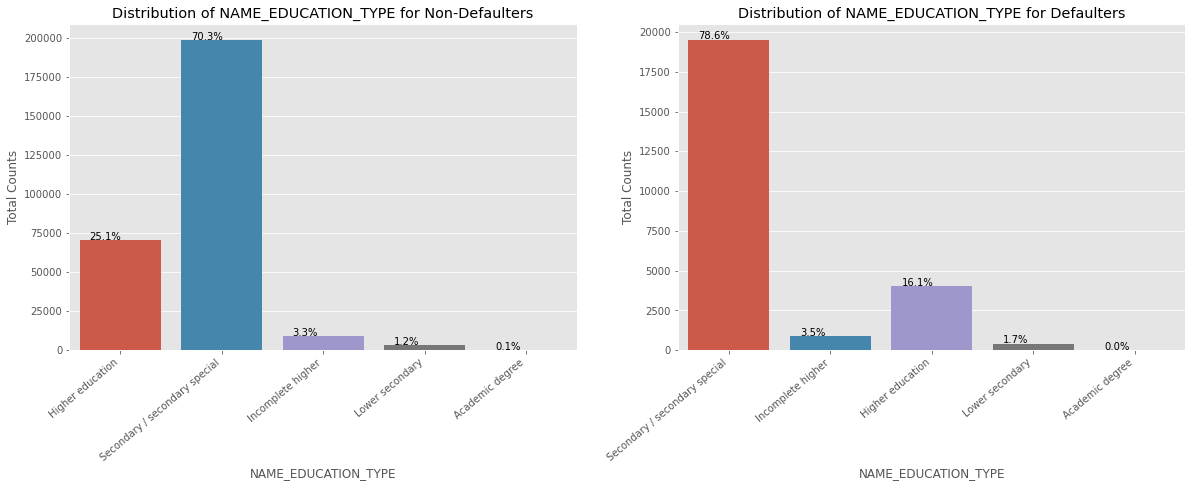

In [75]:
plotunicat('NAME_EDUCATION_TYPE')



From the graph, we can observe that Higher education are Non_Defaulters and the Secondary education lies more in Defaulters

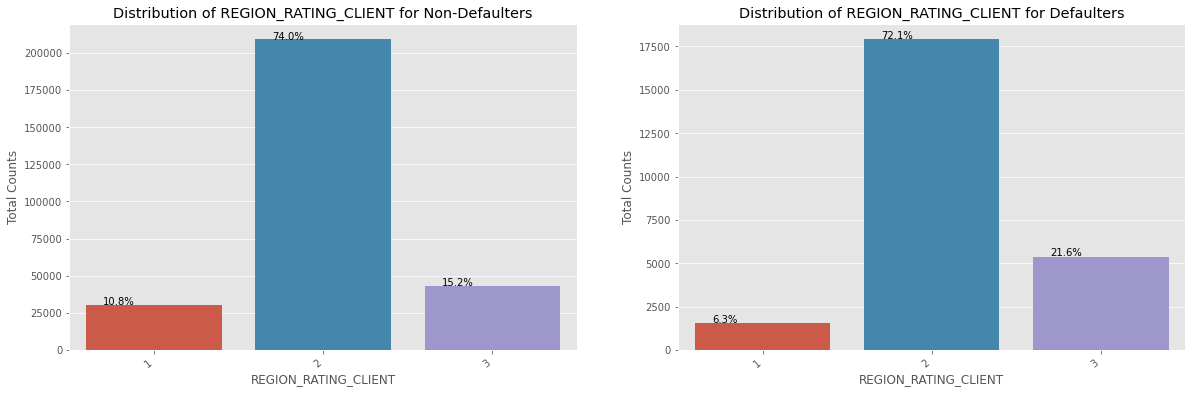

In [76]:
plotunicat('REGION_RATING_CLIENT')


The 2nd Rating are more likely to apply loan in both cases and the Rating1 lies more in Non_Defaulters.

### Finding Correlations

In [77]:
# correlation in target0
corelate=target0.corr()
corelate_df = corelate.where(np.triu(np.ones(corelate.shape),k=1).astype(np.bool)).unstack().reset_index()
corelate_df.columns=['Column1','Column2','Correlation']
corelate_df.dropna(subset=['Correlation'],inplace=True)
corelate_df['Abs_Correlation']=corelate_df['Correlation'].abs()
corelate_df = corelate_df.sort_values(by=['Abs_Correlation'], ascending=False)
corelate_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
370,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332,0.859332
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
309,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309


In [78]:
#correlation in target1
corelate=target1.corr()
corelate_df = corelate.where(np.triu(np.ones(corelate.shape),k=1).astype(np.bool)).unstack().reset_index()
corelate_df.columns=['Column1','Column2','Correlation']
corelate_df.dropna(subset=['Correlation'],inplace=True)
corelate_df['Abs_Correlation']=corelate_df['Correlation'].abs()
corelate_df = corelate_df.sort_values(by=['Abs_Correlation'], ascending=False)
corelate_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
370,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
309,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195


### Bi-Variate Analysis

In [79]:
# function for continuous variables
def plot_bi_var(var1,var2):

    plt.style.use("ggplot")
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=target0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters')
    
    sns.scatterplot(x=var1, y=var2,data=target1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters')
            
    plt.show()


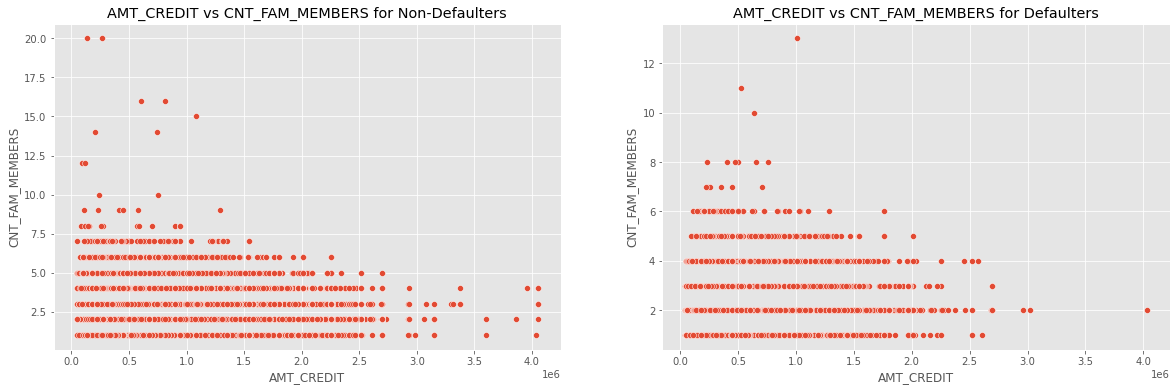

In [80]:
plot_bi_var('AMT_CREDIT','CNT_FAM_MEMBERS')


from the scatter plot above we can observe that the people are  likely to default if the family is small and the AMT_CREDIT is low.

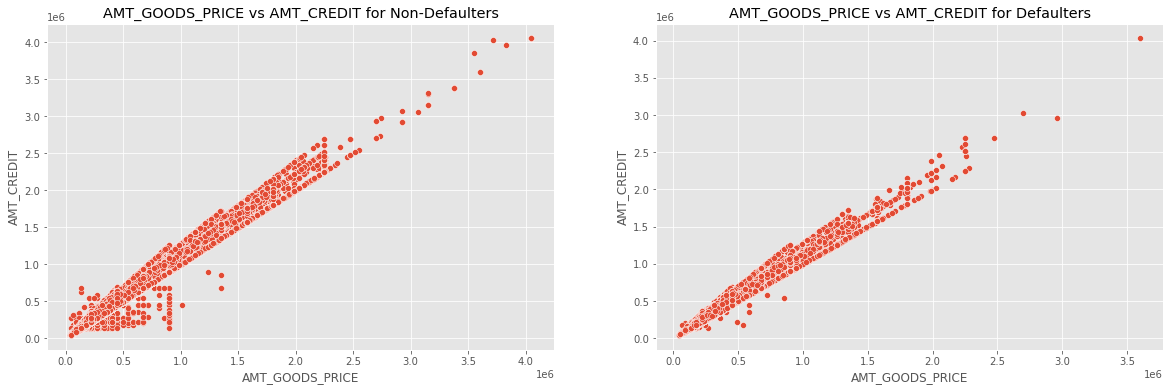

In [81]:
plot_bi_var('AMT_GOODS_PRICE','AMT_CREDIT')


### Loading the previous_application.csv Dataset

In [82]:
# Previous Application Data
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#finding the number rows and columns 
prev_data.shape


(1670214, 37)

In [84]:
#printing the information of each column
prev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
#checking the null value count in each column
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [86]:
# Checking % of missing values

round((prev_data.isnull().sum()/len(prev_data)*100),3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [87]:
# Removing all the columns with more than 50% of null values
prev_data = prev_data.loc[:,prev_data.isnull().mean()<=0.5]
prev_data.shape

(1670214, 33)

In [88]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [89]:
#deleting some irrelevant numerical var columns. 

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_data.drop(axis=1, columns=dropcol, inplace=True)
prev_data.shape

(1670214, 29)

In [90]:
# Analysing values of object variable
for i in prev_data.columns:
    if prev_data[i].dtypes=="object":
        print(prev_data[i].value_counts(normalize=True, dropna= False))

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equ

In [91]:
# Deleting columns 
col_drop=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_data.drop(axis=1, columns=col_drop, inplace=True)
prev_data.shape

(1670214, 23)

In [92]:
# function to count plot for categorical variables
def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=prev_data,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

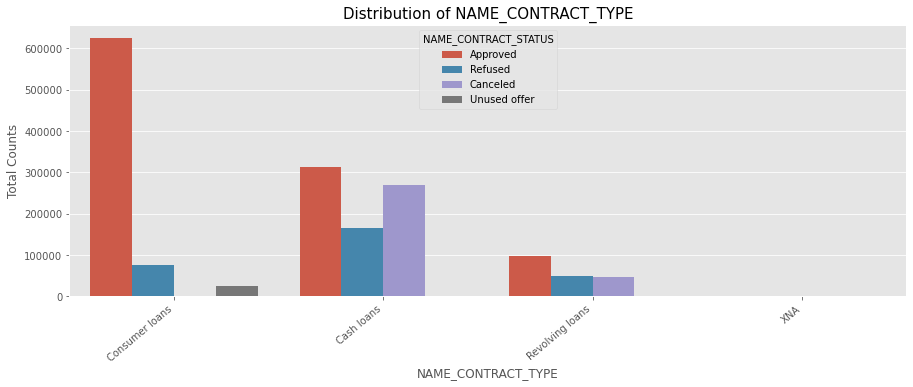

In [93]:
plot_uni('NAME_CONTRACT_TYPE')


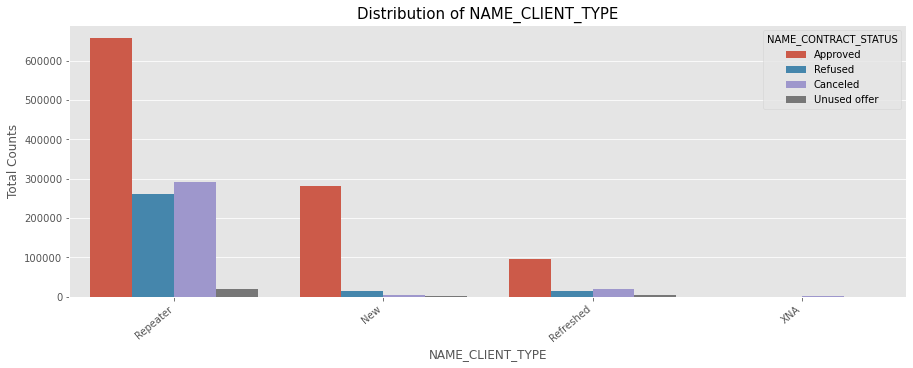

In [94]:
plot_uni('NAME_CLIENT_TYPE')


### Bivariate Analysis on numerical_columns

<Figure size 1440x576 with 0 Axes>

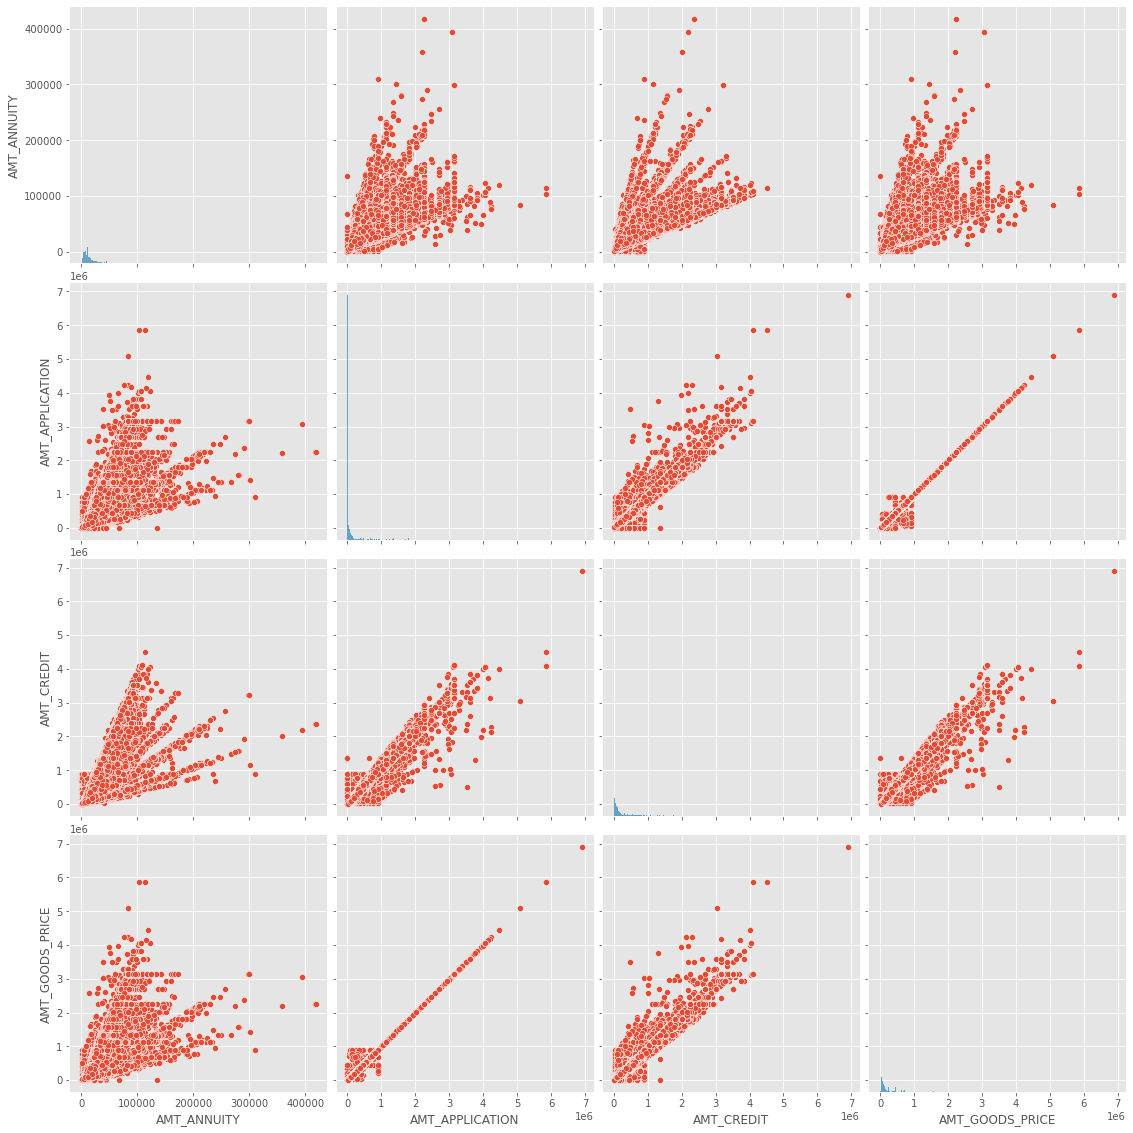

In [95]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']],size = 4) 
plt.show()

Annuity of previous application has positive influence on How much credit did client asked on the previous application
Final credit amount on the previous application approved
Goods price on the previous application.

### Merging the two Datasets

In [96]:
#Merging two data frames
New_df=pd.merge( app_data,prev_data, how='left', on="SK_ID_CURR")
New_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [97]:
New_df.shape

(1430155, 98)

In [98]:
New_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 98 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1426124 non-null  object  
 12  NAME_INCOME_TYPE            

In [99]:
contract_status=New_df['NAME_CONTRACT_STATUS'].unique()
contract_status

array(['Approved', 'Canceled', 'Refused', nan, 'Unused offer'],
      dtype=object)

Approved
0    0.924113
1    0.075887
Name: TARGET, dtype: float64


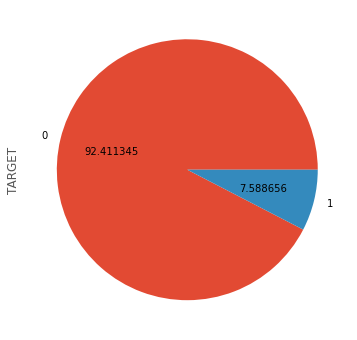

Canceled
0    0.908264
1    0.091736
Name: TARGET, dtype: float64


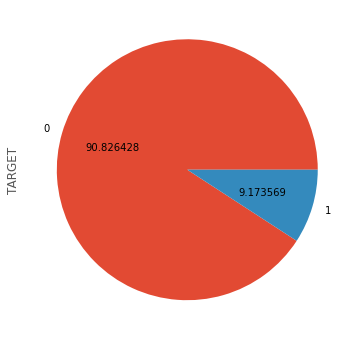

Refused
0    0.880036
1    0.119964
Name: TARGET, dtype: float64


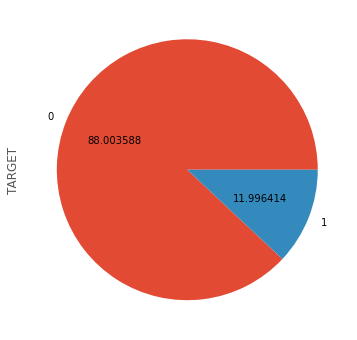

nan
Series([], Name: TARGET, dtype: float64)


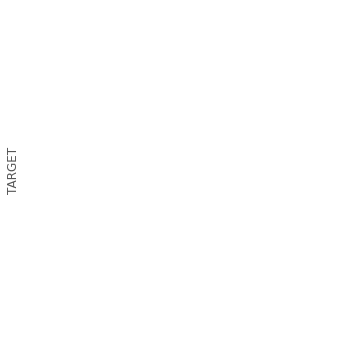

Unused offer
0    0.917483
1    0.082517
Name: TARGET, dtype: float64


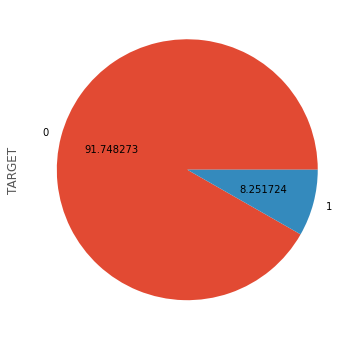

In [100]:
for i in contract_status:
    print(i)
    plt.figure(figsize=[14,6])
    print(New_df[(New_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    New_df[(New_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True,autopct = "%2f")
   # plt.pie(im,labels = labels,autopct='%.2f')

    plt.show()
    

In [101]:
# Number of Defaults in approved cases
approvedDefault=New_df[(New_df['NAME_CONTRACT_STATUS']=="Approved") & (New_df['TARGET']==1)]
approvedDefault.shape

(67243, 98)

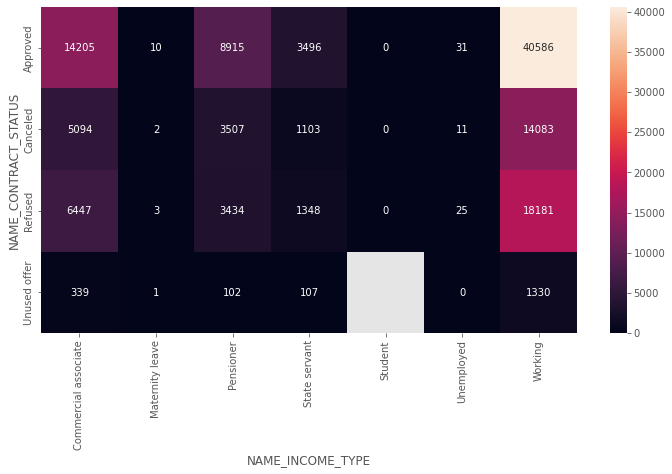

In [102]:
result=pd.pivot_table(data=New_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(result, annot=True,fmt="g")
plt.show()

a)Working Apllicants with Approved status are more Defauliters

b)Previous applications with Refused, Cancelled, Unused loans have default. 
  It indicates that the company had Refused/cancelled previous application, but has approved the current application.
  
c)18181 people who were refuced before are default now.


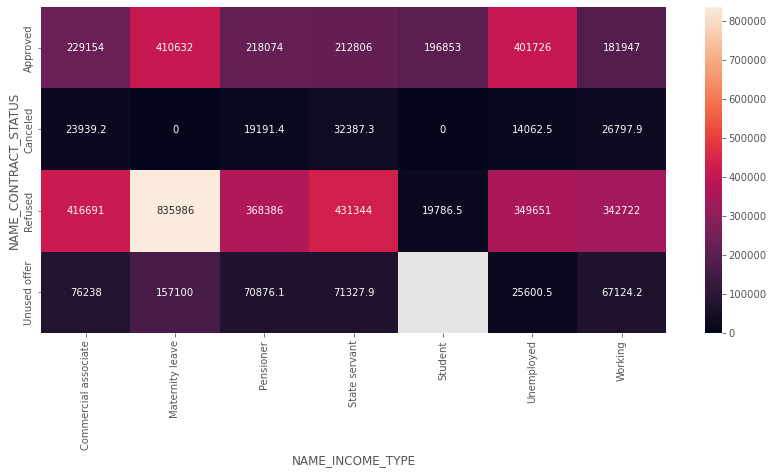

In [103]:
#Checking NAME_CONTRACT_STATUS and NAME_INCOME_TYPE
result=pd.pivot_table(data=New_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(14,6))
sns.heatmap(result, annot=True, fmt="g")
plt.show()


Unused offers have smaller credit values, 
High Credit is offered for Unemployed

In [104]:
cols=['CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE" ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))

F    0.592478
M    0.407522
Name: CODE_GENDER, dtype: float64
Working                 0.603572
Commercial associate    0.211249
Pensioner               0.132579
State servant           0.051991
Unemployed              0.000461
Maternity leave         0.000149
Name: NAME_INCOME_TYPE, dtype: float64
Laborers                 0.313450
Sales staff              0.168184
Drivers                  0.112513
Core staff               0.090382
Managers                 0.071179
Security staff           0.038911
High skill tech staff    0.038204
Cooking staff            0.034105
Medicine staff           0.032712
Accountants              0.026755
Cleaning staff           0.024595
Low-skill Laborers       0.019748
Private service staff    0.009612
Waiters/barmen staff     0.007613
Secretaries              0.005351
Realty agents            0.003514
HR staff                 0.001716
IT staff                 0.001454
Name: OCCUPATION_TYPE, dtype: float64
Business Entity Type 3    0.283788
Self-employed   

Previous applications with Refused, Cancelled, Unused loans  have default,

It shows that the company had Cancelled previous application but approved the current application.
60% of defaulters are Working applicants.

The Proportion of Defaulters is 8.7%.

Females are more to lend the Loan.

Revolving loans are less It Should be increased.


